In [ ]:
# Khai thác dữ liệu từ heart.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl


data = pd.read_csv('heart.csv')
#Loại bỏ cột HeartDisease

display(data.head())

display(data.isnull().sum())



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

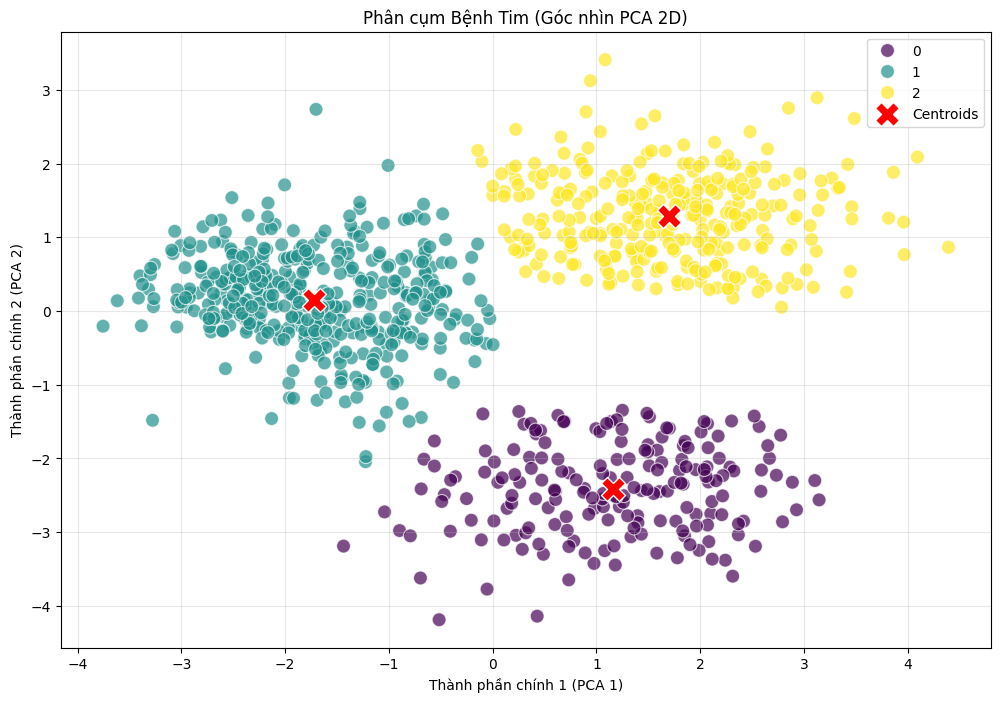

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cluster_Result
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,2
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA # Dùng cái này để vẽ biểu đồ đẹp

# 1. Xử lý dữ liệu (Label Encoding cho cột chữ TRƯỚC)
# Hãy đảm bảo 'data' là bản sao để không ảnh hưởng dữ liệu gốc
df_cluster = data.copy()
le = LabelEncoder()

# Duyệt qua các cột là object (chữ) và không phải HeartDisease để biến thành số
for col in df_cluster.select_dtypes(include=['object']).columns:
    if col != 'HeartDisease':
        df_cluster[col] = le.fit_transform(df_cluster[col])

# 2. Chuẩn hóa dữ liệu (Scale TOÀN BỘ dữ liệu bao gồm cả cột vừa encode)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


# 3. Chạy K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=500)
kmeans.fit(X_scaled) # Train mô hình
labels = kmeans.labels_ # Lấy nhãn

# 4. Giảm chiều dữ liệu xuống 2D để vẽ biểu đồ (PCA)
# Vì dữ liệu có nhiều cột (nhiều chiều), ta cần ép nó xuống 2 chiều (PC1, PC2) để mắt thường nhìn thấy được
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_) # Chuyển đổi cả tâm cụm sang hệ toạ độ PCA

# 5. Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ các điểm dữ liệu
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)

# Vẽ tâm cụm (Centroids)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, marker='X', label='Centroids', edgecolors='white')

plt.title('Phân cụm Bệnh Tim (Góc nhìn PCA 2D)')
plt.xlabel('Thành phần chính 1 (PCA 1)')
plt.ylabel('Thành phần chính 2 (PCA 2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. (Tùy chọn) Gán nhãn ngược lại vào data gốc để xem kết quả
data['Cluster_Result'] = labels
display(data.head())

1. Silhouette Score (Độ tách biệt): 0.191
------------------------------
2. Phân bố bệnh nhân thực tế trong từng cụm:
HeartDisease      0    1
Cluster_Result          
0               375   51
1                25  279
2                10  178

3. Tỷ lệ phần trăm (%):
HeartDisease        0      1
Cluster_Result              
0               88.03  11.97
1                8.22  91.78
2                5.32  94.68


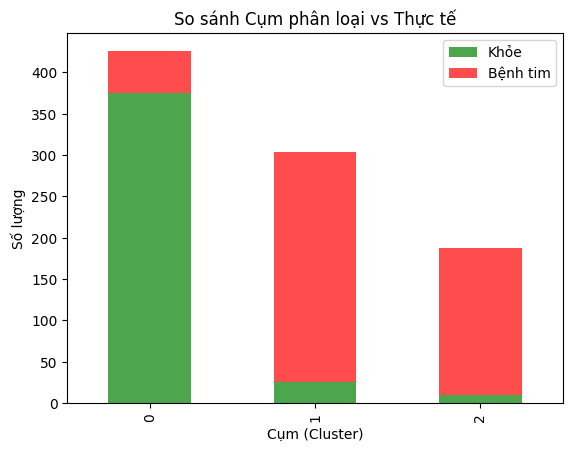

In [ ]:
from sklearn.metrics import silhouette_score

# 1. Tính Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"1. Silhouette Score (Độ tách biệt): {sil_score:.3f}")
print("-" * 30)

# 2. Cross-tabulation (So sánh với bệnh thật)
# Đảm bảo data gốc vẫn còn cột HeartDisease chưa bị encode lung tung
# Nếu cột HeartDisease đã bị encode thì không sao, nhưng phải nhớ 0 là gì, 1 là gì
print("2. Phân bố bệnh nhân thực tế trong từng cụm:")
crosstab = pd.crosstab(data['Cluster_Result'], data['HeartDisease'])
print(crosstab)

# Tính phần trăm bệnh trong mỗi cụm
crosstab_pct = pd.crosstab(data['Cluster_Result'], data['HeartDisease'], normalize='index') * 100
print("\n3. Tỷ lệ phần trăm (%):")
print(crosstab_pct.round(2))

# Vẽ biểu đồ
crosstab.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.title('So sánh Cụm phân loại vs Thực tế')
plt.xlabel('Cụm (Cluster)')
plt.ylabel('Số lượng')
plt.legend(['Khỏe', 'Bệnh tim'])
plt.show()